In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from random import sample
import warnings
import time

#sns.set(color_codes=True)

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

warnings.filterwarnings('ignore')
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
t = datetime.datetime.strptime("2020-W01-7", "%G-W%V-%u")
print(t)
t = datetime.datetime.strptime("2020-W01-7", "%G-W%V-%u")
print(t)

2020-01-05 00:00:00
2020-01-05 00:00:00


In [4]:
%run ./CVGI_MR_00_functions.ipynb

Populating the interactive namespace from numpy and matplotlib


In [8]:
imports()

What is the source of the MOVEMENT data? (1=internet, 2=home Mac, 3=office Windows) 2
What type of import is it? (1 = initial (only cases and movement), 2 = initial (full), 3 = data by week, 4 = merged datasets, 5 = only cases) 4



../../../02 data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185852 entries, 0 to 1185851
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   date             1185852 non-null  datetime64[ns]
 1   GADM_GID_2       1185852 non-null  object        
 2   mun_name         1185852 non-null  object        
 3   movement_change  1185852 non-null  float64       
 4   stay_put         1185852 non-null  float64       
 5   epi_week         1185852 non-null  object        
 6   ibge_code        1185852 non-null  int64         
 7   pop_2020         1185852 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 72.4+ MB

+++++++++++++++++++++++++Movement Range, merged+++++++++++++++++++++++++
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185852 entries, 0 to 1185851
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 

---

In [7]:
drop_brasilio()

KeyError: 'city'

## cases

---

<h4>Scenario A1: Social Vulnerability Index</h4>
1. Select cities with lowest/highest SVI for each region region [list]<br>
2. Prepare the dataframe of events for each city <br>
3. Create a dict of highest SVI cities and of lowest SVI cities<br>
4. Concatenate dict into 2 dataframes: events_svi_high and events_svi_low<br>
5. Fit cases to Kaplan-Meier<br>

Select cities based on SVI:
i. 0% (min) - Luzerna/SC, 4210035 <br>
ii. 25%* - Patrocínio/MG, 3148103 <br>
iii. 50%* - Boa Esperança do Sul/SP, 3506706 <br>
iv. 75%* - Pentecoste/CE, 2310704 <br>
100% (max) - Fernando Falcão/MA, 2104081


In [8]:
#generating the dataframe for the selected cases
cities_list_svi_A1 = ['4210035', '3148103','3506706','2310704','2104081']
events_svi_A1 = events_mc(cities_list_svi_A1)
events_svi_A1

event  week
4210035 0     1.0  15.0
        1     1.0  37.0
        2     1.0  38.0
        3     1.0  44.0
        4     1.0  45.0
...           ...   ...
2310704 70    1.0  53.0
        71    1.0  54.0
        72    1.0  54.0
        73    1.0  54.0
2104081 0     1.0  29.0

[283 rows x 2 columns]

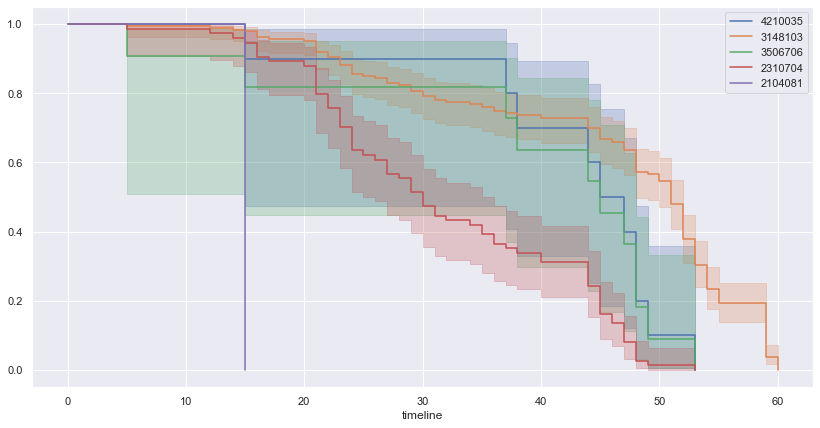

In [40]:
kmf_svi_A1 = plot_kmf(events_svi_A1,cities_list_svi_A1)

In [41]:
kmf_svi_A1.survival_function_


,2104081
timeline,
0.0,1.0
15.0,0.0


In [42]:
kmf_svi_A1.cumulative_density_

,2104081
timeline,
0.0,0.0
15.0,1.0


<h4>Scenario A2: SVI, cities above 20k inhabitants</h4>
i. 0% (min) -  Timbó/SC, 4218202, 44,977 <br>
ii. 25%* -  Patrocínio/MG, 3148103,  91,449  <br>
iii. 50%* -  Feira de Santana/BA, 2910800, 619,609  <br>
iv. 75%* -  Pentecoste/CE, 2310704,  37,900 <br>
100% (max) -  Humberto de Campos/MA, 2105005, 28,932 

In [32]:
#generating the dataframe for the selected cases
cities_list_svi_A2 = ['4218202', '3148103','2910800','2310704','2105005']
events_svi_A2 = events_mc(cities_list_svi_A2)
events_svi_A2

event  week
4218202 0    1.0  14.0
        1    1.0  14.0
        2    1.0  16.0
        3    1.0  16.0
        4    1.0  17.0
...          ...   ...
2105005 5    1.0  22.0
        6    1.0  32.0
        7    1.0  45.0
        8    1.0  48.0
        9    1.0  53.0

[1128 rows x 2 columns]

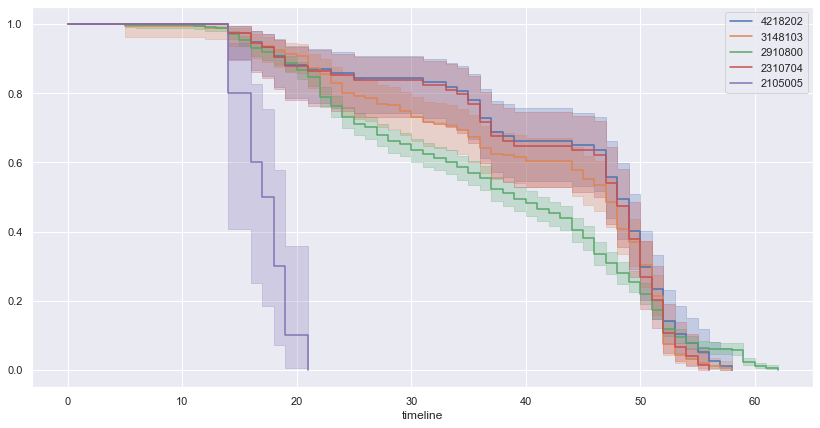

In [33]:
kmf_svi_A2 = plot_kmf(events_svi_A2,cities_list_svi_A2)

<h4>Scenario A3: SVI, cities above 50k inhabitants</h4>
i. 0% (min) -  Tubarão/SC, 4218707, 106,422  <br>
ii. 25%* -  Patrocínio/MG, 3148103,  91,449  <br>
iii. 50%* -  Feira de Santana/BA, 2910800, 619,609  <br>
iv. 75%* - São José de Ribamar/MA, 2111201, 179,028 <br>
100% (max) - Viseu/PA,1508308, 61,751   

In [34]:
#generating the dataframe for the selected cases
cities_list_svi_A3 = ['4218707', '3148103','2910800','2111201','1508308']
events_svi_A3 = events_mc(cities_list_svi_A3)
events_svi_A3

event  week
4218707 0     1.0   3.0
        1     1.0   4.0
        2     1.0   6.0
        3     1.0  12.0
        4     1.0  16.0
...           ...   ...
1508308 27    1.0  54.0
        28    1.0  54.0
        29    1.0  55.0
        30    1.0  55.0
        31    1.0  56.0

[1636 rows x 2 columns]

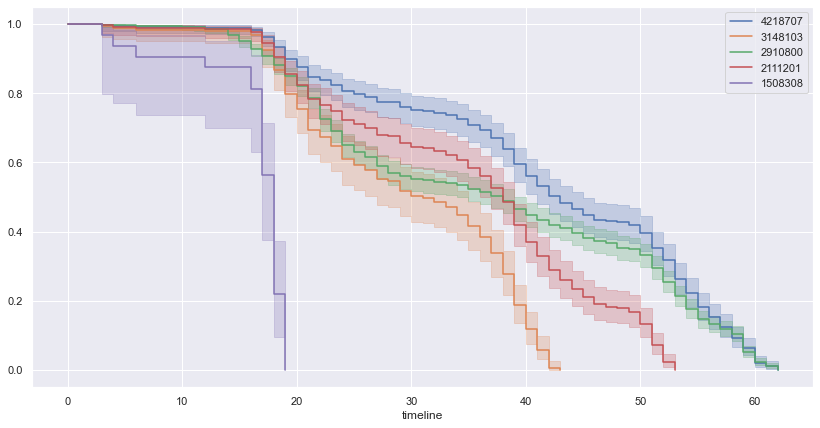

In [37]:
kmf_svi_A3 = plot_kmf(events_svi_A3,cities_list_svi_A3)

<h4>Scenario A4: SVI, cities above 100k inhabitants</h4>
i. 0% (min) -  Tubarão/SC, 4218707, 106,422  <br>
ii. 25%* -  Parnamirim/RN, 2403251, 267,036 <br>
iii. 50%* -  Feira de Santana/BA, 2910800, 619,609  <br>
iv. 75%* - São José de Ribamar/MA, 2111201, 179,028 <br>
100% (max) -  Breves/PA, 1501808, 103,497

In [36]:
#generating the dataframe for the selected cases
cities_list_svi_A4 = ['4218707', '2403251','2910800','2111201','1501808']
events_svi_A4 = events_mc(cities_list_svi_A4)
events_svi_A4

event  week
4218707 0      1.0   3.0
        1      1.0   4.0
        2      1.0   6.0
        3      1.0  12.0
        4      1.0  16.0
...            ...   ...
1501808 106    1.0  52.0
        107    1.0  53.0
        108    1.0  54.0
        109    1.0  54.0
        110    1.0  57.0

[1950 rows x 2 columns]

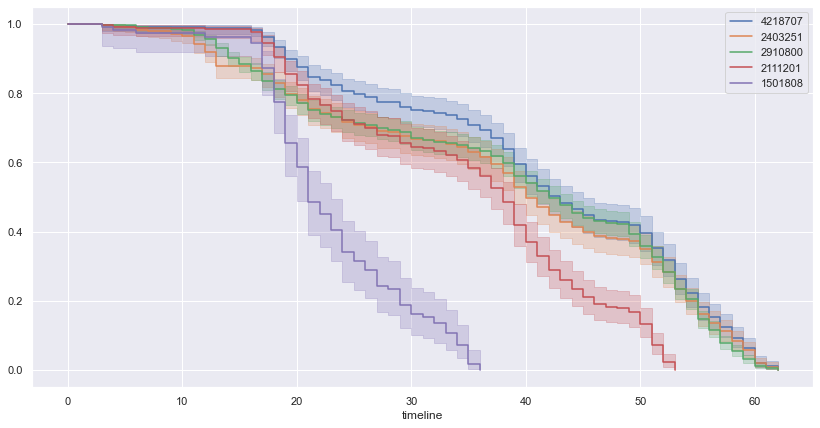

In [38]:
kmf_svi_A4 = plot_kmf(events_svi_A4,cities_list_svi_A4)

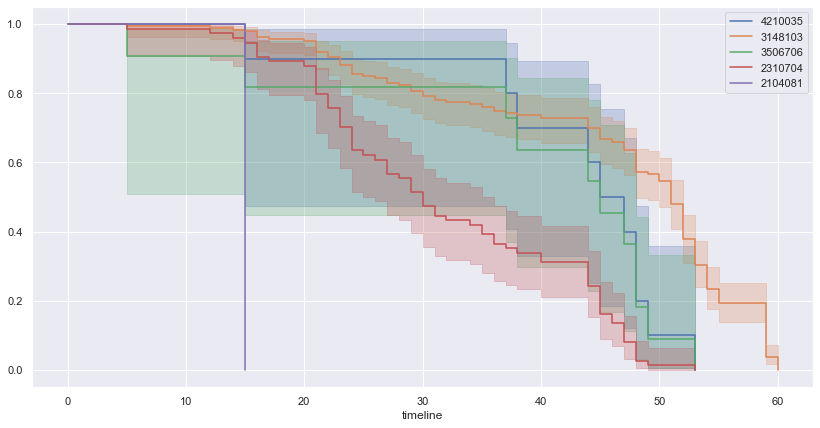

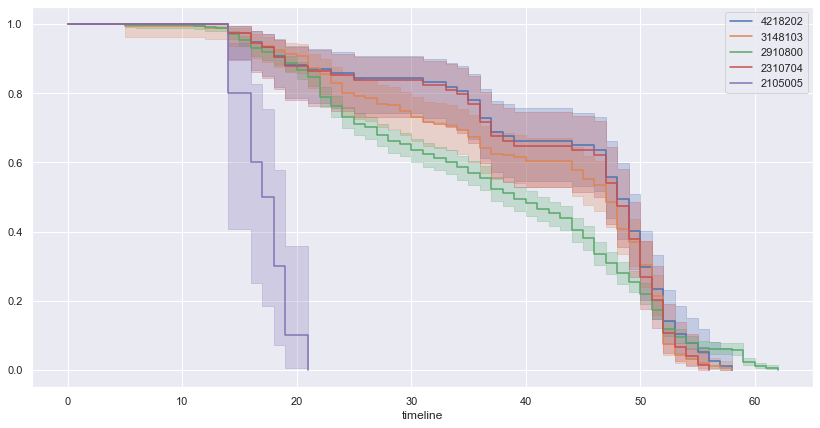

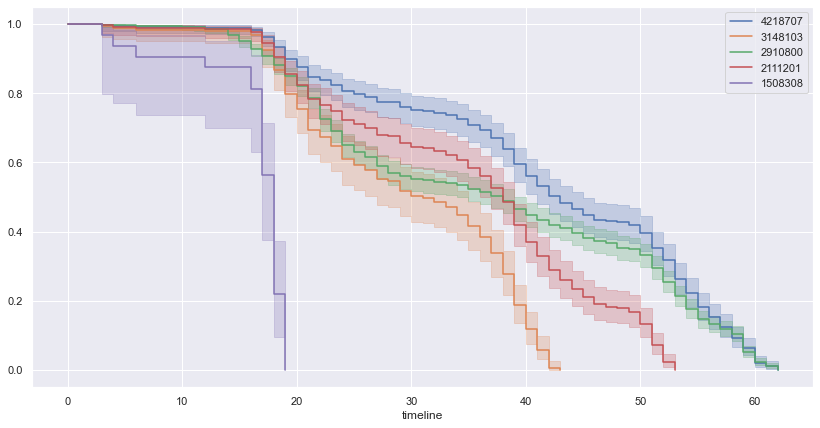

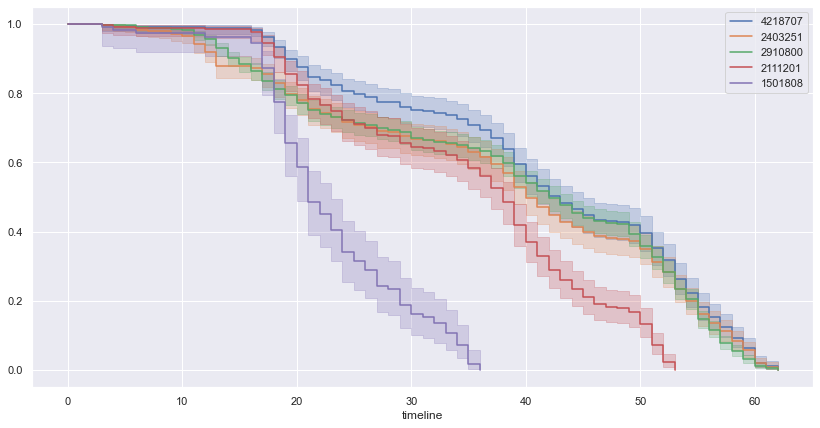

In [63]:
#fig, axes = plt.subplots(2, 2, figsize=(13.5, 7.5))
axes[0][0] = plot_kmf(events_svi_A1,cities_list_svi_A1)
axes[0][1] = plot_kmf(events_svi_A2,cities_list_svi_A2)
axes[1][0] = plot_kmf(events_svi_A3,cities_list_svi_A3)
axes[1][1] = plot_kmf(events_svi_A4,cities_list_svi_A4)

Reordering the cities: from low to high vulnerability

In [9]:
#listing the cities
cities_list_svi_A5 = ['1501808','2111201','2910800','2403251','4218707']
#creating a dict between city names and ibge_code
cities_names_svi_A5_dict = {'1501808':'Breves/PA','2111201':'São José de Ribamar/MA','2910800':'Feira de Santana/BA','2403251':'Parnamirim/RN','4218707':'Tubarão/SC'}
events_svi_A5 = events_mc(cities_list_svi_A5)
events_svi_A5

event  week
1501808 0      1.0   0.0
        1      1.0   1.0
        2      1.0   1.0
        3      1.0   1.0
        4      1.0   1.0
...            ...   ...
4218707 370    1.0  61.0
        371    1.0  62.0
        372    1.0  62.0
        373    1.0  62.0
        374    1.0  62.0

[1950 rows x 2 columns]

In [19]:
events_svi_A5.to_csv('events_svi_A5.csv',encoding='utf-8')

In [11]:
#comparing weeks to get the range that is common to all cases
print("Tubarão", events_svi_A5.loc['4218707'].week.min(),events_svi_A5.loc['4218707'].week.max())
print("Parnamirim", events_svi_A5.loc['2403251'].week.min(),events_svi_A5.loc['2403251'].week.max())
print("Feira de Santana",events_svi_A5.loc['2910800'].week.min(),events_svi_A5.loc['2910800'].week.max())
print("São José de Ribamar", events_svi_A5.loc['2111201'].week.min(),events_svi_A5.loc['2111201'].week.max())
print("Breves",events_svi_A5.loc['1501808'].week.min(),events_svi_A5.loc['1501808'].week.max())

Tubarão 3.0 62.0
Parnamirim 5.0 60.0
Feira de Santana 6.0 64.0
São José de Ribamar 2.0 60.0
Breves 0.0 57.0


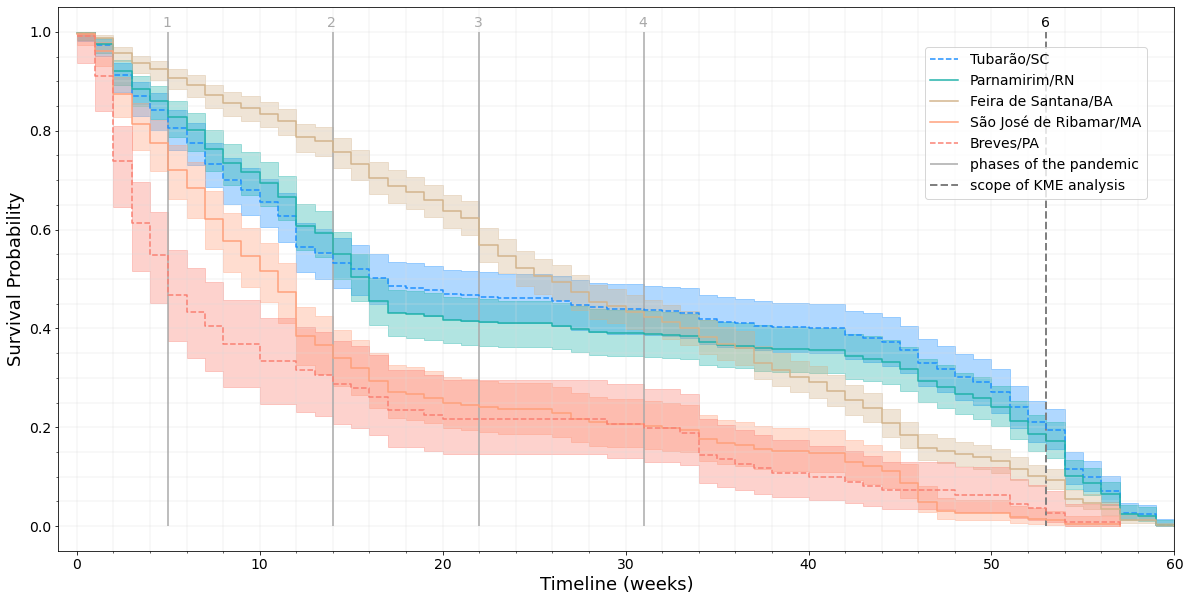

In [12]:
kmf = KaplanMeierFitter() 
df = events_svi_A5
cities_list = cities_list_svi_A5
T = df['week']     ## time to event
E = df['event']      ## event occurred or censored

save_fig = True
ci_alpha_value = 0.35
lineStyles = ['--','-','-.',':']
cmap = matplotlib.cm.get_cmap('tab10') #viridis
color_list = ['dodgerblue','lightseagreen','tan','lightsalmon','salmon']
#setting font sizes
ss = 14
ms = 18
ls = 24
plt.rc('font', size=ss)          # controls default text sizes
plt.rc('axes', titlesize=ls)     # fontsize of the axes title
plt.rc('axes', labelsize=ms)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=ss)    # fontsize of the tick labels
plt.rc('ytick', labelsize=ss)    # fontsize of the tick labels
plt.rc('legend', fontsize=ss)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig,ax = plt.subplots(figsize=(20,10))#,gridspec_kw=dict(right=0.9)

cities_label1 = '4218707'
ix1 = df.loc[cities_label1].index
kmf.fit(T[ix1], E[ix1], label=cities_names_svi_A5_dict[cities_label1]) 
ax = kmf.plot(ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[0],ls=lineStyles[0])

cities_label2 = '2403251'
ix2 = df.loc[cities_label2].index
kmf.fit(T[ix2], E[ix2], label=cities_names_svi_A5_dict[cities_label2]) 
ax2 = kmf.plot(ax=ax,ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[1],ls=lineStyles[1])

cities_label3 = '2910800'
ix3 = df.loc[cities_label3].index
kmf.fit(T[ix3], E[ix3], label=cities_names_svi_A5_dict[cities_label3]) 
ax3 = kmf.plot(ax=ax,ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[2],ls=lineStyles[1])

cities_label4 = '2111201'
ix4 = df.loc[cities_label4].index
kmf.fit(T[ix4], E[ix4], label=cities_names_svi_A5_dict[cities_label4]) 
ax4 = kmf.plot(ax=ax,ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[3],ls=lineStyles[1])

cities_label5 = '1501808'
ix5 = df.loc[cities_label5].index
kmf.fit(T[ix5], E[ix5], label=cities_names_svi_A5_dict[cities_label5]) 
ax4 = kmf.plot(ax=ax,ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[4],ls=lineStyles[0])

vlines_pos = [5,14,22,31]
ax.vlines(vlines_pos, 0, 1, colors='darkgrey',lw=1.5, linestyles='-', label='phases of the pandemic')
for i in range(len(vlines_pos)):
    text((vlines_pos[i]-0.3),1.01,i+1,color='darkgrey')
ax.vlines([53], 0, 1, colors='grey',lw=2, linestyles='--', label='scope of KME analysis')
text(52.7,1.01,'6',color='black')
plt.legend(bbox_to_anchor=(0.77, 0.94), loc='upper left')
plt.minorticks_on()
plt.grid(b=True, which='both',color='gainsboro', linestyle='-', linewidth=0.4)

ax.set(xlabel='Timeline (weeks)', ylabel='Survival Probability',xlim=[-1,60])

if save_fig == True:
    file_name = 'CVGI_KME_SVI_cities_sample_A5.png'
    file_path = Path('./OUT/')
    url = file_path / file_name
    plt.savefig(url, dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()

---

In [18]:
week_num_df = pd.read_excel("./out/CVGI_SVI_sample_cities_100k.xlsx", sheet_name="epi_week_num", converters={'week_num_py':int64,'epi_week':str})
week_num_df

FileNotFoundError: [Errno 2] No such file or directory: './out/CVGI_SVI_sample_cities_100k.xlsx'

In [16]:
cases_A5 = cases[cases['ibge_code'].isin(cities_list_svi_A5)]
cases_A5

,ibge_code,epi_week,acc_cases,acc_deaths,new_cases,new_deaths,pop_2019,epi_week_col,acc_cases_100k,acc_deaths_1mi,epi_week_date
10245,1501808,2020.17,37,5,11,1,102701.0,2020.17,36.03,48.69,2020-05-03
10246,1501808,2020.18,216,34,31,9,102701.0,2020.18,210.32,331.06,2020-05-10
10247,1501808,2020.19,827,136,145,19,102701.0,2020.19,805.25,1324.23,2020-05-17
10248,1501808,2020.20,1939,257,163,14,102701.0,2020.20,1888.00,2502.41,2020-05-24
10249,1501808,2020.21,2805,335,82,7,102701.0,2020.21,2731.23,3261.90,2020-05-31
...,...,...,...,...,...,...,...,...,...,...,...
255347,4218707,2021.17,124937,2345,236,12,105686.0,2021.17,118215.28,22188.37,2021-05-02
255348,4218707,2021.18,126721,2424,257,11,105686.0,2021.18,119903.30,22935.87,2021-05-09
255349,4218707,2021.19,128267,2510,174,16,105686.0,2021.19,121366.12,23749.60,2021-05-16
255350,4218707,2021.20,129700,2586,211,4,105686.0,2021.20,122722.03,24468.71,2021-05-23


In [17]:
print(cases_A5.dtypes)
print(week_num_df.dtypes)

ibge_code                 object
epi_week                  object
acc_cases                  int64
acc_deaths                 int64
new_cases                  int64
new_deaths                 int64
pop_2019                 float64
epi_week_col              object
acc_cases_100k           float64
acc_deaths_1mi           float64
epi_week_date     datetime64[ns]
dtype: object


NameError: name 'week_num_df' is not defined

In [15]:
for i, val in enumerate(cases_A5.epidemiological_week):
    txt = left(str(val),4) + "." + right(str(val),2)
    cases_A5['epi_week'].iloc[i] = txt
cases_A5

NameError: name 'cases_A5' is not defined

In [113]:
cases_A5_merged = cases_A5.merge(right=week_num_df,how="left", on="epi_week") #left_on=True, right_on=False
cases_A5_merged

,mun_name,ibge_code,date,epidemiological_week,pop_2019,is_last,is_repeated,acc_cases,acc_deaths,new_cases,new_deaths,epi_week,week_num_py,date_of_ref
0,Feira de Santana,2910800,2020-03-06,202010,614872.0,False,False,1,0,1,0,2020.10,2,2020-03-03
1,Feira de Santana,2910800,2020-03-07,202010,614872.0,False,False,2,0,1,0,2020.10,2,2020-03-03
2,Feira de Santana,2910800,2020-03-08,202011,614872.0,False,True,2,0,0,0,2020.11,3,2020-03-10
3,Feira de Santana,2910800,2020-03-09,202011,614872.0,False,False,2,0,0,0,2020.11,3,2020-03-10
4,Feira de Santana,2910800,2020-03-10,202011,614872.0,False,False,2,0,0,0,2020.11,3,2020-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,Tubarão,4218707,2021-05-21,202120,105686.0,False,False,18607,371,46,0,2021.20,65,2021-05-18
2127,Tubarão,4218707,2021-05-22,202120,105686.0,False,False,18624,371,17,0,2021.20,65,2021-05-18
2128,Tubarão,4218707,2021-05-23,202121,105686.0,False,False,18646,371,22,0,2021.21,66,2021-05-25
2129,Tubarão,4218707,2021-05-24,202121,105686.0,False,True,18646,371,0,0,2021.21,66,2021-05-25


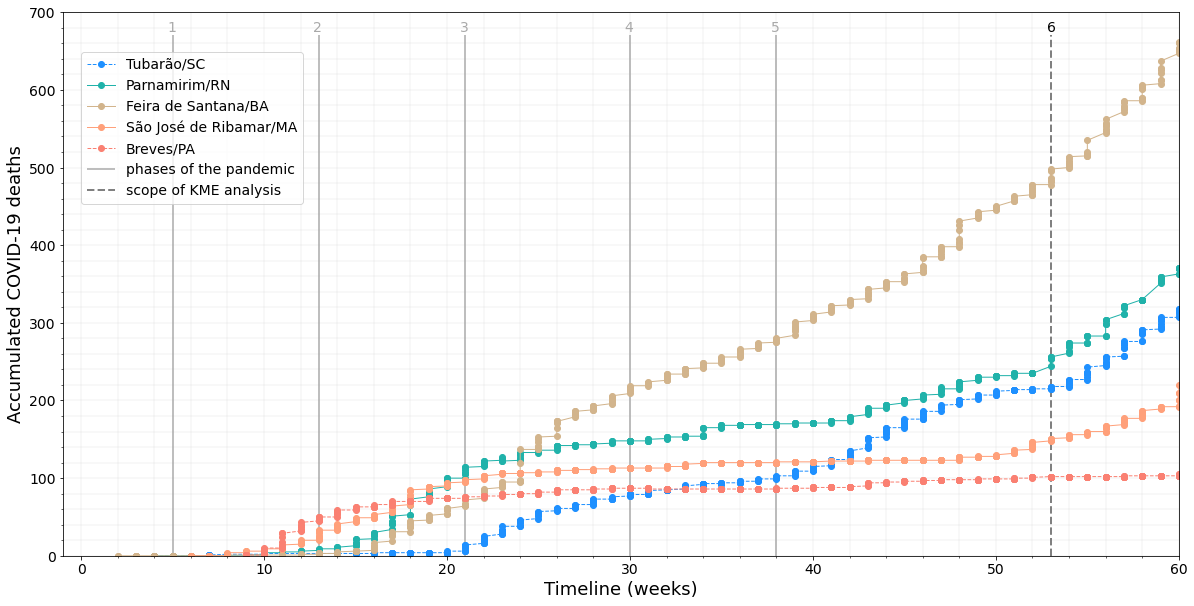

In [144]:
df = cases_A5_merged
cities_list = cities_list_svi_A5
X = 'week_num_py'     
Y = 'acc_deaths'

save_fig = True
ci_alpha_value = 0.35
lineStyles = ['--','-','-.',':']
cmap = matplotlib.cm.get_cmap('tab10') #viridis
color_list = ['dodgerblue','lightseagreen','tan','lightsalmon','salmon']
#setting font sizes
ss = 14
ms = 18
ls = 24
plt.rc('font', size=ss)          # controls default text sizes
plt.rc('axes', titlesize=ls)     # fontsize of the axes title
plt.rc('axes', labelsize=ms)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=ss)    # fontsize of the tick labels
plt.rc('ytick', labelsize=ss)    # fontsize of the tick labels
plt.rc('legend', fontsize=ss)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(20,10))

cities_label1 = '4218707'
ax.plot(X, Y, data=df[df.ibge_code==cities_label1], marker='o', markerfacecolor=color_list[0], markersize=6, color=color_list[0], linewidth=1,ls=lineStyles[0],label=cities_names_svi_A5_dict[cities_label1])

cities_label2 = '2403251'
ax.plot(X, Y, data=df[df.ibge_code==cities_label2], marker='o', markerfacecolor=color_list[1], markersize=6, color=color_list[1], linewidth=1,ls=lineStyles[1],label=cities_names_svi_A5_dict[cities_label2])

cities_label3 = '2910800'
ax.plot(X, Y, data=df[df.ibge_code==cities_label3], marker='o', markerfacecolor=color_list[2], markersize=6, color=color_list[2], linewidth=1,ls=lineStyles[1],label=cities_names_svi_A5_dict[cities_label3])

cities_label4 = '2111201'
ax.plot(X, Y, data=df[df.ibge_code==cities_label4], marker='o', markerfacecolor=color_list[3], markersize=6, color=color_list[3], linewidth=1,ls=lineStyles[1],label=cities_names_svi_A5_dict[cities_label4])

cities_label5 = '1501808'
ax.plot(X, Y, data=df[df.ibge_code==cities_label5], marker='o', markerfacecolor=color_list[4], markersize=6, color=color_list[4], linewidth=1,ls=lineStyles[0],label=cities_names_svi_A5_dict[cities_label5])

vlines_pos = [5,13,21,30,38]
ax.vlines(vlines_pos, 0, 670, colors='darkgrey',lw=1.5, linestyles='-', label='phases of the pandemic')
for i in range(len(vlines_pos)):
    text((vlines_pos[i]-0.3),675,i+1,color='darkgrey')
ax.vlines([53], 0, 670, colors='grey',lw=2, linestyles='--', label='scope of KME analysis')
text(52.8,675,'6',color='black')
plt.legend(bbox_to_anchor=(0.01, 0.94), loc='upper left')

plt.minorticks_on()
plt.grid(b=True, which='both',color='gainsboro', linestyle='-', linewidth=0.4)

ax.set(xlabel='Timeline (weeks)', ylabel='Accumulated COVID-19 deaths',ylim=[0,700],xlim=[-1,60])

if save_fig == True:
    file_name = 'CVGI_ACCDeaths_SVI_cities_sample_A5.png'
    file_path = Path('./OUT')
    url = file_path / file_name
    plt.savefig(url, dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()

In [67]:
cities_list_svi_A5 = ['1501808','2111201','2910800','2403251','4218707']
cases_A5 = cases[cases['ibge_code'].isin(cities_list_svi_A5)]
cases_A5

,ibge_code,epi_week,acc_cases,acc_deaths,new_cases,new_deaths,pop_2019,epi_week_col,acc_cases_100k,acc_deaths_1mi,epi_week_date
10245,1501808,2020.17,37,5,11,1,102701.0,2020.17,36.03,48.69,2020-05-03
10246,1501808,2020.18,216,34,31,9,102701.0,2020.18,210.32,331.06,2020-05-10
10247,1501808,2020.19,827,136,145,19,102701.0,2020.19,805.25,1324.23,2020-05-17
10248,1501808,2020.20,1939,257,163,14,102701.0,2020.20,1888.00,2502.41,2020-05-24
10249,1501808,2020.21,2805,335,82,7,102701.0,2020.21,2731.23,3261.90,2020-05-31
...,...,...,...,...,...,...,...,...,...,...,...
255347,4218707,2021.17,124937,2345,236,12,105686.0,2021.17,118215.28,22188.37,2021-05-02
255348,4218707,2021.18,126721,2424,257,11,105686.0,2021.18,119903.30,22935.87,2021-05-09
255349,4218707,2021.19,128267,2510,174,16,105686.0,2021.19,121366.12,23749.60,2021-05-16
255350,4218707,2021.20,129700,2586,211,4,105686.0,2021.20,122722.03,24468.71,2021-05-23


In [21]:
cases_A5[cases_A5.epi_week == "2020.13"]

,ibge_code,epi_week,acc_cases,acc_deaths,new_cases,new_deaths,pop_2019,epi_week_col,acc_cases_100k,acc_deaths_1mi,epi_week_date
62755,2403251,2020.13,31,0,7,0,261469.0,2020.13,11.86,0.0,2020-04-05
110284,2910800,2020.13,55,0,3,0,614872.0,2020.13,8.94,0.0,2020-04-05
255290,4218707,2020.13,54,0,2,0,105686.0,2020.13,51.09,0.0,2020-04-05


In [13]:
print("PH0 - Accumulated cases in epid. week 09.2020",cases[cases.epi_week <= "2020.09"].new_deaths.sum())
print("PH1 = Accumulated cases in epid. week 13.2020",cases[cases.epi_week <= "2020.13"].new_deaths.sum())
print("PH2 - Accumulated cases in epid. week 21.2020",cases[cases.epi_week <= "2020.21"].new_deaths.sum())
print("PH3 - Accumulated cases in epid. week 29.2020",cases[cases.epi_week <= "2020.29"].new_deaths.sum())
print("PH4 - Accumulated cases in epid. week 38.2020",cases[cases.epi_week <= "2020.38"].new_deaths.sum())
print("PH5 - Accumulated cases in epid. week 46.2020",cases[cases.epi_week <= "2020.46"].new_deaths.sum())
print("PH6 - Accumulated cases in epid. week 08.2021",cases[cases.epi_week <= "2021.08"].new_deaths.sum())
print("PH7 - Accumulated cases in epid. week 15.2021",cases[cases.epi_week <= "2021.15"].new_deaths.sum())

PH0 - Accumulated cases in epid. week 09.2020 0
PH1 = Accumulated cases in epid. week 13.2020 97
PH2 - Accumulated cases in epid. week 21.2020 22165
PH3 - Accumulated cases in epid. week 29.2020 78643
PH4 - Accumulated cases in epid. week 38.2020 135018
PH5 - Accumulated cases in epid. week 46.2020 163207
PH6 - Accumulated cases in epid. week 08.2021 253372
PH7 - Accumulated cases in epid. week 15.2021 365223


In [20]:
print("PH0 - Accumulated cases in epid. week 09.2020",cases[cases.epi_week <= "2020.09"].new_deaths.sum())
print("PH1 = Accumulated cases in epid. week 13.2020",cases[cases.epi_week <= "2020.13"].new_deaths.sum())
print("PH2 - Accumulated cases in epid. week 21.2020",cases[cases.epi_week <= "2020.21"].new_deaths.sum())
print("PH3 - Accumulated cases in epid. week 29.2020",cases[cases.epi_week <= "2020.29"].new_deaths.sum())
print("PH4 - Accumulated cases in epid. week 38.2020",cases[cases.epi_week <= "2020.38"].new_deaths.sum())
print("PH5 - Accumulated cases in epid. week 46.2020",cases[cases.epi_week <= "2020.46"].new_deaths.sum())
print("PH6 - Accumulated cases in epid. week 08.2021",cases[cases.epi_week <= "2021.08"].new_deaths.sum())
print("PH7 - Accumulated cases in epid. week 15.2021",cases[cases.epi_week <= "2021.15"].new_deaths.sum())

PH0 - Accumulated cases in epid. week 09.2020 0
PH1 = Accumulated cases in epid. week 13.2020 97
PH2 - Accumulated cases in epid. week 21.2020 22165
PH3 - Accumulated cases in epid. week 29.2020 78643
PH4 - Accumulated cases in epid. week 38.2020 135018
PH5 - Accumulated cases in epid. week 46.2020 163207
PH6 - Accumulated cases in epid. week 08.2021 253372
PH7 - Accumulated cases in epid. week 15.2021 365223


In [14]:
print("PH0 - Accumulated deaths in epid. week 09.2020 at", cities_names_svi_A5_dict[cities_list_svi_A5[0]],cases_A5[(cases_A5.epi_week <= "2020.09")&(cases_A5.ibge_code == cities_list_svi_A5[0])].new_deaths.sum())
print("PH6 - Accumulated deaths in epid. week 02.2021 at", cities_names_svi_A5_dict[cities_list_svi_A5[0]],cases_A5[(cases_A5.epi_week <= "2021.08")&(cases_A5.ibge_code == cities_list_svi_A5[0])].new_deaths.sum())
print("PH0 - Accumulated deaths in epid. week 09.2020 at", cities_names_svi_A5_dict[cities_list_svi_A5[1]],cases_A5[(cases_A5.epi_week <= "2020.09")&(cases_A5.ibge_code == cities_list_svi_A5[1])].new_deaths.sum())
print("PH6 - Accumulated deaths in epid. week 02.2021 at", cities_names_svi_A5_dict[cities_list_svi_A5[1]],cases_A5[(cases_A5.epi_week <= "2021.08")&(cases_A5.ibge_code == cities_list_svi_A5[1])].new_deaths.sum())
print("PH0 - Accumulated deaths in epid. week 09.2020 at", cities_names_svi_A5_dict[cities_list_svi_A5[2]],cases_A5[(cases_A5.epi_week <= "2020.09")&(cases_A5.ibge_code == cities_list_svi_A5[2])].new_deaths.sum())
print("PH6 - Accumulated deaths in epid. week 02.2021 at", cities_names_svi_A5_dict[cities_list_svi_A5[2]],cases_A5[(cases_A5.epi_week <= "2021.08")&(cases_A5.ibge_code == cities_list_svi_A5[2])].new_deaths.sum())
print("PH0 - Accumulated deaths in epid. week 09.2020 at", cities_names_svi_A5_dict[cities_list_svi_A5[3]],cases_A5[(cases_A5.epi_week <= "2020.09")&(cases_A5.ibge_code == cities_list_svi_A5[3])].new_deaths.sum())
print("PH6 - Accumulated deaths in epid. week 02.2021 at", cities_names_svi_A5_dict[cities_list_svi_A5[3]],cases_A5[(cases_A5.epi_week <= "2021.08")&(cases_A5.ibge_code == cities_list_svi_A5[3])].new_deaths.sum())
print("PH0 - Accumulated deaths in epid. week 09.2020 at", cities_names_svi_A5_dict[cities_list_svi_A5[4]],cases_A5[(cases_A5.epi_week <= "2020.09")&(cases_A5.ibge_code == cities_list_svi_A5[4])].new_deaths.sum())
print("PH6 - Accumulated deaths in epid. week 02.2021 at", cities_names_svi_A5_dict[cities_list_svi_A5[4]],cases_A5[(cases_A5.epi_week <= "2021.08")&(cases_A5.ibge_code == cities_list_svi_A5[4])].new_deaths.sum())

NameError: name 'cases_A5' is not defined

In [245]:
print("Accumulated cases in epid. week 09.2020 at", cities_names_svi_A5_dict[cities_list_svi_A5[0]],cases_A5[(cases_A5.epi_week <= "2020.09")&(cases_A5.ibge_code ==cities_list_svi_A5[0])].new_cases.sum())
print("Accumulated cases in epid. week 02.2021 at", cities_names_svi_A5_dict[cities_list_svi_A5[0]],cases_A5[(cases_A5.epi_week <= "2021.08")&(cases_A5.ibge_code ==cities_list_svi_A5[0])].new_cases.sum())
print("Accumulated cases in epid. week 09.2020 at", cities_names_svi_A5_dict[cities_list_svi_A5[1]],cases_A5[(cases_A5.epi_week <= "2020.09")&(cases_A5.ibge_code ==cities_list_svi_A5[1])].new_cases.sum())
print("Accumulated cases in epid. week 02.2021 at", cities_names_svi_A5_dict[cities_list_svi_A5[1]],cases_A5[(cases_A5.epi_week <= "2021.08")&(cases_A5.ibge_code ==cities_list_svi_A5[1])].new_cases.sum())
print("Accumulated cases in epid. week 09.2020 at", cities_names_svi_A5_dict[cities_list_svi_A5[2]],cases_A5[(cases_A5.epi_week <= "2020.09")&(cases_A5.ibge_code ==cities_list_svi_A5[2])].new_cases.sum())
print("Accumulated cases in epid. week 02.2021 at", cities_names_svi_A5_dict[cities_list_svi_A5[2]],cases_A5[(cases_A5.epi_week <= "2021.08")&(cases_A5.ibge_code ==cities_list_svi_A5[2])].new_cases.sum())
print("Accumulated cases in epid. week 09.2020 at", cities_names_svi_A5_dict[cities_list_svi_A5[3]],cases_A5[(cases_A5.epi_week <= "2020.09")&(cases_A5.ibge_code ==cities_list_svi_A5[3])].new_cases.sum())
print("Accumulated cases in epid. week 02.2021 at", cities_names_svi_A5_dict[cities_list_svi_A5[3]],cases_A5[(cases_A5.epi_week <= "2021.08")&(cases_A5.ibge_code ==cities_list_svi_A5[3])].new_cases.sum())
print("Accumulated cases in epid. week 09.2020 at", cities_names_svi_A5_dict[cities_list_svi_A5[4]],cases_A5[(cases_A5.epi_week <= "2020.09")&(cases_A5.ibge_code ==cities_list_svi_A5[4])].new_cases.sum())
print("Accumulated cases in epid. week 02.2021 at", cities_names_svi_A5_dict[cities_list_svi_A5[4]],cases_A5[(cases_A5.epi_week <= "2021.08")&(cases_A5.ibge_code ==cities_list_svi_A5[4])].new_cases.sum())

Accumulated cases in epid. week 09.2020 at Breves/PA 0
Accumulated cases in epid. week 02.2021 at Breves/PA 3578
Accumulated cases in epid. week 09.2020 at São José de Ribamar/MA 0
Accumulated cases in epid. week 02.2021 at São José de Ribamar/MA 1748
Accumulated cases in epid. week 09.2020 at Feira de Santana/BA 0
Accumulated cases in epid. week 02.2021 at Feira de Santana/BA 29106
Accumulated cases in epid. week 09.2020 at Parnamirim/RN 0
Accumulated cases in epid. week 02.2021 at Parnamirim/RN 16051
Accumulated cases in epid. week 09.2020 at Tubarão/SC 0
Accumulated cases in epid. week 02.2021 at Tubarão/SC 14062
